## HW3

Brett Scroggins, Suyi Tu, Yannick Heard

### Q1 Read in data

* Change the working directory
* Roughly look at the files
* Use read.table() to open the files and choose '\t' as the separator
* Use drop_duplicates() to remove duplicated rows

In [2]:
import pandas as pd
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Input the gold table as a DataFrame with the separator as a white space and category names assigned.
gold = pd.read_table('/Users/brettscroggins/Downloads/gold.txt',
                     delim_whitespace=True, names=('url', 'category'))

In [4]:
# Input the labels table as a DataFrame with the separator as a white space and category names assigned.
labels = pd.read_table('/Users/brettscroggins/Downloads/labels.txt',
                     delim_whitespace=True, names=('turk','url','category'))

### Q2 Split into two DataFrames

* Create the mask using .isin()
* Use the mask to seperate the dataframe

In [5]:
mask_gold = labels['url'].isin(gold['url'])
labels_on_gold = labels[mask_gold].copy()
labels_unknown = labels[~mask_gold].copy()
len(labels_unknown)

89397

### Q3 Computer accuracies of turks

* Merge gold with labels_on_gold, and compare the categories to see if it is correct
* Use value_counts() on label['turk'] to count the number of ratings for each rater
* Use aggregate function groupby and sum to count the number of correct ratings for each rater
* Avg correctness = number of correct ratings / number of ratings

In [6]:
df_comparison = labels_on_gold.merge(gold,left_on='url',right_on='url',suffixes=['label','gold'])
df_comparison['correct'] = (df_comparison['categorylabel']==df_comparison['categorygold'])
accuracy = df_comparison.groupby('turk')['correct'].sum()/df_comparison.groupby('turk')['correct'].count()
rater_goodness = pd.DataFrame({'Number of Gold Ratings':df_comparison.groupby('turk')['correct'].count(),'Accuracy':accuracy})
print len(rater_goodness)
rater_goodness[:5]

269


,Accuracy,Number of Gold Ratings
turk,,
A112DVP1KG4QZU,1.000000,1
A1253FXHCZ9CWM,0.517241,29
A12CY1Q7XKJJDE,1.000000,1
A12RE8G66WTO8B,0.750000,20
A12Y1GTGIQDGRA,0.333333,3


### Q4 Odds ratios

* odds = avg_goodness / (1.001 - avg_goodness)

In [7]:
rater_goodness['Odds'] = rater_goodness['Accuracy']/ (1.001 - rater_goodness['Accuracy'])
print len(rater_goodness)
rater_goodness[:5]

269


,Accuracy,Number of Gold Ratings,Odds
turk,,,
A112DVP1KG4QZU,1.000000,1,1000.000000
A1253FXHCZ9CWM,0.517241,29,1.069214
A12CY1Q7XKJJDE,1.000000,1,1000.000000
A12RE8G66WTO8B,0.750000,20,2.988048
A12Y1GTGIQDGRA,0.333333,3,0.499251


### Q5 Most accurate turks

* Use a mask to get the avg_correctness of raters that rate at least 20 gold set urls
* Use sort_values on the correctness and get the top 10 accurate turks

In [8]:
rater_goodness[rater_goodness['Number of Gold Ratings']>20]['Accuracy'].sort_values(ascending=False)[:10]

turk
A22C0PJUBFJTI0    0.916667
A23YQUBXZPKILZ    0.875000
ATVALOQVDCMZW     0.854369
A1HIXWH4OXT8S4    0.825000
A3220HG1O83HQ4    0.818182
A32W20KGQXS0LL    0.800000
AJSJVK40F5HM6     0.785714
A31OCN4MNHUQ6W    0.777174
A3MA9V9UPGCOK7    0.774648
A3IP9KYNZZ028B    0.772727
Name: Accuracy, dtype: float64

### Q6 Rating counts versus accuracy

* Use a maske to get the raters that rate the gold set
* plot their accuracy against counts

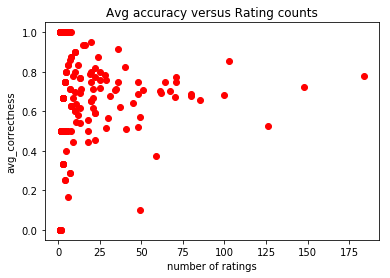

In [9]:
plot(rater_goodness['Number of Gold Ratings'],rater_goodness['Accuracy'],marker='o',color='red',linestyle='None')
xlabel('number of ratings')
ylabel('avg_correctness')
title('Avg accuracy versus Rating counts')

#### Generally, the more turks rate, the more accurate they are.

### Q7 Overall predicted odds

* Create a pair of (u,c) in the labels_unknown created at Q2
* Use quantile to get 75% of the number of golden set rated by each rater
* Use a mask to get the information of turks who have rated more(>) gold set urls than 75% of all turks
* Merge information of the turks with labels_unknown
* Group the merged df by (u,c) pairs and calculate the overall predicted odds

In [10]:
labels_unknown['pair'] = labels_unknown.apply(lambda x: (x['url'],x['category']),axis=1)

Upper_gr_turks = rater_goodness[rater_goodness['Number of Gold Ratings']>rater_goodness['Number of Gold Ratings'].quantile(q=0.75)].copy()
Upper_gr_turks['turk'] = Upper_gr_turks.index

df_labelunknown = (labels_unknown.merge(Upper_gr_turks,left_on='turk',right_on='turk',suffixes=['Unknown','Upper_turks'])).fillna(0)
print len(df_labelunknown)
df_labelunknown[:10]

40621


,turk,url,category,pair,Accuracy,Number of Gold Ratings,Odds
0,A1PXXEOGQ76RNJ,http://000.cc,G,"(http://000.cc, G)",0.512195,41,1.047852
1,A1PXXEOGQ76RNJ,http://000.cc,G,"(http://000.cc, G)",0.512195,41,1.047852
2,A1PXXEOGQ76RNJ,http://0000.jp,G,"(http://0000.jp, G)",0.512195,41,1.047852
3,A1PXXEOGQ76RNJ,http://000relationships.com,G,"(http://000relationships.com, G)",0.512195,41,1.047852
4,A1PXXEOGQ76RNJ,http://000relationships.com,G,"(http://000relationships.com, G)",0.512195,41,1.047852
5,A1PXXEOGQ76RNJ,http://007swz.cn,G,"(http://007swz.cn, G)",0.512195,41,1.047852
6,A1PXXEOGQ76RNJ,http://01768.com,G,"(http://01768.com, G)",0.512195,41,1.047852
7,A1PXXEOGQ76RNJ,http://0198.cc,G,"(http://0198.cc, G)",0.512195,41,1.047852
8,A1PXXEOGQ76RNJ,http://01house.cn,G,"(http://01house.cn, G)",0.512195,41,1.047852
9,A1PXXEOGQ76RNJ,http://01house.cn,G,"(http://01house.cn, G)",0.512195,41,1.047852


In [11]:
Overall_odds = df_labelunknown.groupby('pair')['Odds'].prod().fillna(0)
Overall_odds[:20]

pair
(http://0-101.net, G)                                              2.155963
(http://000.cc, G)                                                 1.460583
(http://0000.jp, G)                                               14.488244
(http://000relationships.com, G)                                   5.681060
(http://000relationships.com, P)                                   1.851852
(http://000vitamins.com, G)                                        3.784982
(http://000webhost.com, G)                                        11.159502
(http://003my.com, G)                                              4.912040
(http://007absolutehardcore.com/early_cumshots/index.html, P)      3.346522
(http://007absolutehardcore.com/early_cumshots/index.html, R)     12.290450
(http://007absolutehardcore.com/early_cumshots/index.html, X)    293.252871
(http://007swz.cn, G)                                              1.393883
(http://01768.com, G)                                              1.393883
(http:/

### Q8 Predicted categories

* Use zip(\*tuple) to unpack the pair and create a dataframe with url,category,odds as its columns
* Use groupby and max to find the largest overall_odd and the corresponding category of a certain url

In [12]:
import numpy as np
Overall_odds_df=pd.DataFrame([list(zip(*Overall_odds.index.values))[0],list(zip(*Overall_odds.index.values))[1],Overall_odds.values],index=['urls','category','overall_odds']).T
results_75 = Overall_odds_df.groupby('urls')['category','overall_odds'].agg(lambda x: x.loc[np.argmax(x['overall_odds'])])
results_75.columns = ['top category','top odds']
print len(results_75)
results_75[:10]                                                                   

10610


,top category,top odds
urls,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,5.681060
http://000vitamins.com,G,3.784982
http://000webhost.com,G,11.159502
http://003my.com,G,4.912040
http://007absolutehardcore.com/early_cumshots/index.html,X,293.252871
http://007swz.cn,G,1.393883


### Q9 Predicted categories using more turks

* Use the same method to calculate resuls_25(>quantile(0.25))
* Use crosstab to compare the results

In [13]:
Upper_gr_turks_25 = rater_goodness[rater_goodness['Number of Gold Ratings']>rater_goodness['Number of Gold Ratings'].quantile(q=0.25)].copy()
Upper_gr_turks_25['turk'] = Upper_gr_turks_25.index

df_labelunknown_25 = (labels_unknown.merge(Upper_gr_turks_25,left_on='turk',right_on='turk',suffixes=['Unknown','Upper_turks'])).fillna(0)

Overall_odds_25 = df_labelunknown_25.groupby('pair')['Odds'].prod().fillna(0)
Overall_odds_df_25=pd.DataFrame([list(zip(*Overall_odds_25.index.values))[0],list(zip(*Overall_odds_25.index.values))[1],Overall_odds_25.values],index=['urls','category','overall_odds']).T

results_25 = Overall_odds_df_25.groupby('urls')['category','overall_odds'].agg(lambda x: x.loc[np.argmax(x['overall_odds'])])
results_25.columns = ['top category','top odds']

In [14]:
len(results_25)

10700

In [15]:
a = pd.concat([results_25['top category'],results_75['top category']],axis=1)
a.columns = ['topcate_25','topcate_75']
pd.crosstab(a['topcate_75'],a['topcate_25'],margins=True)

topcate_25,G,P,R,X,All
topcate_75,,,,,
G,8327,574,186,216,9303
P,189,328,47,19,583
R,21,34,128,25,208
X,27,6,26,457,516
All,8564,942,387,717,10610


#### category = _G_ has the most errors